In [1]:
using CausalForest
using StatsBase
using Plots
using Distributions

Modèle 

$$Y = 10 X_1 + \epsilon$$

X est 10 features toutes uniformes sur [0,1].

Epsilon suit loi normale (0,1).

$n=10^3$ observations

In [2]:
n, m = 10^3, 10
u = Uniform()
features = rand(u, (n, m))
d = Normal()
eps = rand(d, 1000)
labels = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0]  .+ eps

model = build_forest_oob(labels, features, 10, 1000);

In [3]:
function get_all_nodes_in_tree!(
    tree ,
    depth = 3,
    result  = []
    )
    if hasproperty(tree, :featid) && depth > 0
        push!(result, tree.featid)
        get_all_nodes_in_tree!(tree.left, depth-1, result)
        get_all_nodes_in_tree!(tree.right, depth-1, result)
    end
    return result
end

get_all_nodes_in_tree! (generic function with 3 methods)

In [4]:
function get_freq(forest, depth=3) 
    ensemble = forest.trees
    n_trees = length(ensemble)
    res = []
    for i = 1:n_trees
        append!(res, get_all_nodes_in_tree!(forest.trees[i].tree, depth))
    end
    return proportionmap(res)
end

get_freq (generic function with 2 methods)

In [5]:
get_freq(model, 3)

Dict{Any, Float64} with 10 entries:
  5  => 0.01
  4  => 0.00228571
  6  => 0.00214286
  7  => 0.000428571
  2  => 0.00342857
  10 => 0.00257143
  9  => 0.00185714
  8  => 0.00142857
  3  => 0.001
  1  => 0.974857

In [6]:
get_freq(model, 5)

Dict{Any, Float64} with 10 entries:
  5  => 0.089279
  4  => 0.0728247
  6  => 0.0700079
  7  => 0.0640651
  2  => 0.0720003
  10 => 0.0630689
  9  => 0.0745079
  8  => 0.0805194
  3  => 0.0478857
  1  => 0.365841

In [7]:
get_freq(model, 10)

Dict{Any, Float64} with 10 entries:
  5  => 0.0981391
  4  => 0.0928302
  6  => 0.093578
  7  => 0.0894748
  2  => 0.0925779
  10 => 0.0888673
  9  => 0.0943444
  8  => 0.0951762
  3  => 0.0799693
  1  => 0.175043

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + 0.5$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

$n=10^4$ observations

In [8]:
n, m = 10^4, 10
u = Uniform()
features = rand(u, (n, m))
X = features
d = Normal()
eps = rand(d, n)
b = Bernoulli()
T = convert(Vector{Int64},rand(b, n))
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ 0.5

cf1 = build_forest(false, true, Y, T, features, true, 10, 1000);

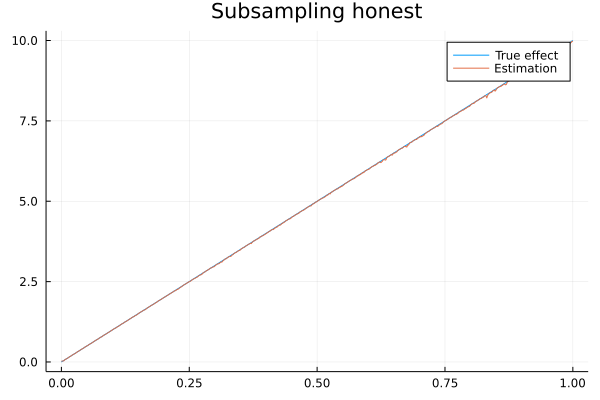

In [9]:
Xtest = rand(Float64, (1000, size(X, 2)));
Xtest[:, 1] =  LinRange(0, 1, 1000);
true_effect = Xtest[:, 1].*10;
pred1 = apply_forest(cf1, Xtest);
plot(Xtest[:, 1], [true_effect, pred1], label=["True effect" "Estimation"], title = "Subsampling honest", fmt = :png)

In [10]:
get_freq(cf1, 3)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [11]:
get_freq(cf1, 5)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [12]:
get_freq(cf1, 10)

Dict{Any, Float64} with 10 entries:
  5  => 0.00636521
  4  => 0.0058915
  6  => 0.00597888
  7  => 0.00673314
  2  => 0.00647099
  10 => 0.00617204
  9  => 0.00591909
  8  => 0.00671474
  3  => 0.0064296
  1  => 0.943325

In [13]:
get_freq(cf1, 1000)

Dict{Any, Float64} with 10 entries:
  5  => 0.00636521
  4  => 0.0058915
  6  => 0.00597888
  7  => 0.00673314
  2  => 0.00647099
  10 => 0.00617204
  9  => 0.00591909
  8  => 0.00671474
  3  => 0.0064296
  1  => 0.943325

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + \epsilon$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

Epsilon suit loi normale (0,1).

$n=10^4$ observations

In [14]:
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ eps

cf1 = build_forest(false, true, Y, T, X, true, 10, 1000);

In [15]:
get_freq(cf1, 3)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [16]:
get_freq(cf1, 5)

Dict{Any, Float64} with 10 entries:
  5  => 0.0619847
  4  => 0.0715208
  6  => 0.0564551
  7  => 0.0578127
  2  => 0.0603954
  10 => 0.0597331
  9  => 0.0633754
  8  => 0.0704944
  3  => 0.0557597
  1  => 0.442469

In [17]:
get_freq(cf1, 10)

Dict{Any, Float64} with 10 entries:
  5  => 0.0972857
  4  => 0.0978303
  6  => 0.0902978
  7  => 0.093134
  2  => 0.0945035
  10 => 0.0942393
  9  => 0.0939535
  8  => 0.0960941
  3  => 0.0917375
  1  => 0.150924

In [18]:
get_freq(cf1, 1000)

Dict{Any, Float64} with 10 entries:
  5  => 0.0984604
  4  => 0.0987181
  6  => 0.0925116
  7  => 0.0942456
  2  => 0.0957786
  10 => 0.0958966
  9  => 0.0948702
  8  => 0.0968007
  3  => 0.0926514
  1  => 0.140067

$n=10^5$ maintenant

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + 0.5$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

$n=10^5$ observations

In [19]:
n, m = 10^5, 10
u = Uniform()
features = rand(u, (n, m))
X = features
d = Normal()
eps = rand(d, n)
b = Bernoulli()
T = convert(Vector{Int64},rand(b, n))
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ 0.5

cf1 = build_forest(false, true, Y, T, features, true, 10, 1000);

In [20]:
get_freq(cf1, 3)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [21]:
get_freq(cf1, 5)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [22]:
get_freq(cf1, 10)

Dict{Any, Float64} with 10 entries:
  5  => 1.76551e-5
  4  => 1.56934e-5
  6  => 2.74634e-5
  7  => 2.94251e-5
  2  => 1.56934e-5
  10 => 1.76551e-5
  9  => 2.84443e-5
  8  => 2.64826e-5
  3  => 2.25592e-5
  1  => 0.999799

In [23]:
get_freq(cf1, 1000)

Dict{Any, Float64} with 10 entries:
  5  => 0.00599362
  4  => 0.00588613
  6  => 0.0058074
  7  => 0.00577817
  2  => 0.0058338
  10 => 0.00578712
  9  => 0.00587576
  8  => 0.00586586
  3  => 0.00568576
  1  => 0.947486

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + \epsilon$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

Epsilon suit loi normale (0,1).

$n=10^5$ observations

In [24]:
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ eps

cf1 = build_forest(false, true, Y, T, X, true, 10, 1000);

In [25]:
get_freq(cf1, 3)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [26]:
get_freq(cf1, 5)

Dict{Any, Float64} with 10 entries:
  5  => 0.0202258
  4  => 0.0228065
  6  => 0.0191613
  7  => 0.017129
  2  => 0.0257097
  10 => 0.016871
  9  => 0.0164516
  8  => 0.0235484
  3  => 0.0155161
  1  => 0.822581

In [27]:
get_freq(cf1, 10)

Dict{Any, Float64} with 10 entries:
  5  => 0.0946382
  4  => 0.0925904
  6  => 0.0936918
  7  => 0.092758
  2  => 0.0972569
  10 => 0.0946404
  9  => 0.0958903
  8  => 0.0954659
  3  => 0.0928132
  1  => 0.150255

In [28]:
get_freq(cf1, 1000)

Dict{Any, Float64} with 10 entries:
  5  => 0.0986638
  4  => 0.0982043
  6  => 0.098575
  7  => 0.0982461
  2  => 0.100083
  10 => 0.0990005
  9  => 0.0991556
  8  => 0.0991464
  3  => 0.0992196
  1  => 0.109706

In [29]:
n, m = 10^4, 10
u = Uniform()
features = rand(u, (n, m))
d = Normal()
eps = rand(d, 10000)
labels = cos.(features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0]) + sin.(features*[0, 0, 2, 0, 0, 0, 3, 0, 0, 0]) .+ eps

model = build_forest_oob(labels, features, 10, 1000);

In [30]:
get_freq(model, 3)

Dict{Any, Float64} with 10 entries:
  5  => 0.000714286
  4  => 0.00157143
  6  => 0.000285714
  7  => 0.216857
  2  => 0.00114286
  10 => 0.000428571
  9  => 0.000428571
  8  => 0.000571429
  3  => 0.199429
  1  => 0.578571

In [31]:
get_freq(model, 5)

Dict{Any, Float64} with 10 entries:
  5  => 0.0277443
  4  => 0.0326614
  6  => 0.0222085
  7  => 0.163893
  2  => 0.0260836
  10 => 0.0264092
  9  => 0.023739
  8  => 0.0268977
  3  => 0.176333
  1  => 0.47403

In [32]:
get_freq(model, 10)

Dict{Any, Float64} with 10 entries:
  5  => 0.0871553
  4  => 0.0871123
  6  => 0.0870404
  7  => 0.126074
  2  => 0.0856039
  10 => 0.0848018
  9  => 0.0852423
  8  => 0.0855081
  3  => 0.124434
  1  => 0.147028